# 101.1. A template tutorial notebook

<img align="left" src = https://noirlab.edu/public/media/archives/logos/svg/logo250.svg width=250 style="background-color:white; padding:10px" alt="Rubin Observatory logo, a graphical representation of turning stars into data.">

<br>
For the Rubin Science Platform at data.lsst.cloud. <br>
LSST Science Pipelines version: Weekly <i>yyyy_xx</i> <br>
Container Size: <i>size here</i> <br>
Data Release: <i>DPX or DRX</i> <br>
Last verified to run: <i>yyyy-mm-dd</i> <br>

***How to use this template.*** 

_Most of the text in italics in this template is instructional and should be removed or replaced, as appropriate._ 

_Most of the text in_ **bold** _or_ regular _should either stay as-is, or is an example of what a real tutorial would say._

_Use the <a href="https://rtn-045.lsst.io">CST's Guidelines for Tutorial Notebooks</a>._

_While developing, execute the code cell below to use flake8 to ensure code cells conform to standards._

_When the tutorial is done, delete this cell and the one below._

In [ ]:
%load_ext pycodestyle_magic
%flake8_on
import logging
logging.getLogger("flake8").setLevel(logging.FATAL)

**Learning objective:** _Very brief description of notebook's learning objective._

**LSST data products:** _List the catalogs and images used._

**Packages:** _List the python packages that are relevant to the learning objective. E.g., include afwDisplay and lsst.daf.butler for a notebook about retrieving and displaying images. E.g., standard supporting packages like os, glob, or numpy usually don't need to be listed here._

**Credit:**
_E.g., "Originally developed by" or "Based on notebooks developed by" and then people's names, including journal article or software release citations if appropriate._
Please consider acknowledging them if this notebook is used for the preparation of journal articles, software releases, or other notebooks.

**Get Support:**
Everyone is encouraged to ask questions or raise issues in the 
<a href="https://community.lsst.org/c/support">Support Category</a> 
of the Rubin Community Forum.
Rubin staff will respond to all questions posted there.

## 1. Introduction

_Provide a light narrative about this notebook, e.g., "This notebook demonstrates..."._

_Cite or link to any external information, documentation, or papers._

_Describe key scientific concepts._

**Related tutorials:** _If applicable, mention other relevant tutorials by name but do not link to them.
Tutorials evolve continuously, there is no linkchecker for the notebook repo, and tutorial hotlinks will go stale quickly. It is not necessary to mention the preceding/subsequent tutorials in the same series as this one - those are trivial for the user to find. But do use this section to mention related tutorials in other series._

### 1.1. Import packages

_All package imports must be done in the first code cell._

_Do not import packages unless they are used._

_Describe the packages being imported, and provide external links to package documentation._

Import `numpy`, a fundamental package for scientific computing with arrays in Python
(<a href="https://numpy.org">numpy.org</a>), and
`matplotlib`, a comprehensive library for data visualization
(<a href="https://matplotlib.org/">matplotlib.org</a>; 
<a href="https://matplotlib.org/stable/gallery/index.html">matplotlib gallery</a>).

From the `lsst` package, import modules for accessing the Table Access Protocol (TAP) service,
the butler, and image display functions from the LSST Science Pipelines (<a href="https://pipelines.lsst.io/">pipelines.lsst.io</a>).

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from lsst.rsp import get_tap_service, retrieve_query
import lsst.daf.butler as dafButler
import lsst.afw.display as afwDisplay

### 1.2. Define parameters and functions

_All functions and global parameters must be defined here._

_Do not define a function unless it will be used multiple times throughout the notebook; it is better for users to see code in context._

_If no functions/parameters are defined, it is ok to rename or remove this section, as appropriate._

_It is also ok to use sub-sub-sections if many parameters or functions are needed.
E.g., "#### 1.2.1. Define global cosmological parameter values" or "#### 1.2.2. Define a function to make an image cutout"._

_For example, one or both of the following color definitions should be used for plotting._
_Instances of the butler or TAP services should be created in this section._

Define parameters to use colorblind-friendly colors with `matplotlib`.

In [ ]:
plt.style.use('tableau-colorblind10')

Define colors, symbols, and linestyles to represent the six LSST filters, $ugrizy$.

In [ ]:
filter_names = ['u', 'g', 'r', 'i', 'z', 'y']
filter_colors = {'u': '#0c71ff', 'g': '#49be61', 'r': '#c61c00',
                 'i': '#ffc200', 'z': '#f341a2', 'y': '#5d0000'}
filter_symbols = {'u': 'o', 'g': '^', 'r': 'v', 'i': 's', 'z': '*', 'y': 'p'}
filter_linestyles = {'u': '--', 'g': ':', 'r': '-', 'i': '-.',
                     'z': (0, (3, 5, 1, 5, 1, 5)), 'y': (0, (3, 1, 1, 1))}

Get an instance of the TAP service, and assert that it exists.

In [ ]:
service = get_tap_service("tap")
assert service is not None

_Functions must have a preceding markdown cell with a brief explanation and they must contain docstrings formatted as in this example._

Define a function to calculate the semi-major axis of an asteroid's orbit.

In [ ]:
def calc_semimajor_axis(q, e):
    """
    Given a perihelion distance and orbital eccentricity,
      calculate the semi-major axis of the orbit.

    Parameters
    ----------
    q: float
        Distance at perihelion, in au.
    e: float
        Orbital eccentricity.

    Returns
    -------
    a: float
        Semi-major axis of the orbit, in au.
        q = a(1-e), so a = q/(1-e)
    """

    return q / (1.0 - e)

## 2. Section heading

_Use numbers for sections, sub-sections, and sub-sub-sections to enable referencing.
E.g., so that users can say "I'm having trouble with the second code cell in Section 2.3."_

_Use section titles that actively describe what is being done, e.g., "Create a color-magnitude diagram".
Do not use ambiguous section headings like "Plot".
Descriptive headings make the auto-generated table of contents easier for users to navigate._

### 2.1. Warnings

_Use indented text to attract users attention to common mistakes, known warnings, etc._

> **Warning:** *use indented text preceded with* ***Warning*** *to attract attention to particular information.*

_If a code cell produces a warning or error that is safe to ignore, it must be preceded with an explanation.
Here is an example._

> **Warning:** Pink "RuntimeWarning" errors will appear due to a few of the measured fluxes in the denominator being zero. It is safe to ignore this warning in the context of this demonstration, which is not doing any scientific analysis.

#### 2.1.1. Images and plots

_Drag-and-drop to embed images.
The code below is automatically generated by drag-and-drop.
All figures must have captions: both embedded and code-generated images.
Format captions as shown._

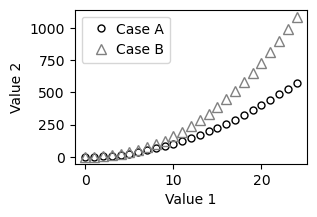

> **Figure 1:** Value 2 as a function of Value 1 for Case A as black open circles and Case B as grey open triangles.
> This figure shows that in Case B the power law has a higher exponent.

#### 2.1.2. Provide instruction in the imperative mood

_Jupyter Notebook tutorials alternate between markdown cells with instructional statements written in the imperative mood, and code cells to be executed by the user._

_As an example, here is a set of markdown and code cells to execute an asynchronous TAP query._

This ADQL query defined below is designed to retrieve the `coord_ra` and `coord_dec` columns for all `Object`s that are within 0.01 degrees of the coordinate defined by Right Ascension (RA) = 62 deg, and Declination (Dec) = -37 deg, and for which the `detect_isPrimary` flag is True (= 1).

Create the `query` string.

In [ ]:
query = "SELECT coord_ra, coord_dec "\
        "FROM dp02_dc2_catalogs.Object "\
        "WHERE CONTAINS(POINT('ICRS', coord_ra, coord_dec), "\
        "CIRCLE('ICRS', 62, -37, 0.01)) = 1 "\
        "AND detect_isPrimary = 1"

Submit the query as a job to the TAP service.

In [ ]:
job = service.submit_job(query)
print('Job URL is', job.url)
print('Job phase is', job.phase)

Run the job and wait until the job phase is either "COMPLETED" or "ERROR", then print the job phase.

In [ ]:
job.run()
job.wait(phases=['COMPLETED', 'ERROR'])
print('Job phase is', job.phase)

**Optional:** If the status returned was "ERROR", uncomment and execute this cell to print the error messages.

In [ ]:
# job.raise_if_error()

If the status returned was "COMPLETED", execute this cell to retrieve the query results as an `astropy` table using the `to_table` method, and assert that the table length is 173 as expected.

In [ ]:
results = job.fetch_result().to_table()
assert len(results) == 173

Save space in memory by deleting the job and the retrieved results.

In [ ]:
job.delete()
del results